In [41]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

In [42]:
# 전체 코드 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [43]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [44]:
### 1.CCTV데이터 불러오고 전처리

In [45]:
# 데이터 불러오기 
cctv_seoul=pd.read_csv('../[0]data/서울시_CCTV.csv',index_col=0)
cctv_seoul.head(30)
cctv_seoul.tail(30)

,지역구,합계
년도,,
2017,종로구,1435
2017,중 구,1142
2017,용산구,1334
2017,성동구,2413
2017,광진구,1204
2017,동대문구,1805
2017,중랑구,1131
2017,성북구,1938
2017,강북구,443


,지역구,합계
년도,,
2018,관악구,3937
2018,서초구,2923
2018,강남구,4770
2018,송파구,1450
2018,강동구,1577
2019,종로구,1529
2019,중 구,1683
2019,용산구,1766
2019,성동구,3065


In [46]:
# 연도별로 데이터 분할 
cctv_seoul_2017=cctv_seoul.loc['2017']
cctv_seoul_2018=cctv_seoul.loc['2018']
cctv_seoul_2019=cctv_seoul.loc['2019']

In [47]:
cctv_seoul_2017
cctv_seoul_2018
cctv_seoul_2019

,지역구,합계
년도,,
2017,종로구,1435
2017,중 구,1142
2017,용산구,1334
2017,성동구,2413
2017,광진구,1204
2017,동대문구,1805
2017,중랑구,1131
2017,성북구,1938
2017,강북구,443


,지역구,합계
년도,,
2018,종로구,1520
2018,중 구,1528
2018,용산구,1459
2018,성동구,2803
2018,광진구,1669
2018,동대문구,2002
2018,중랑구,1304
2018,성북구,2805
2018,강북구,835


,지역구,합계
년도,,
2019,종로구,1529
2019,중 구,1683
2019,용산구,1766
2019,성동구,3065
2019,광진구,2381
2019,동대문구,2211
2019,중랑구,2353
2019,성북구,3519
2019,강북구,1835


In [48]:
### 2. 5대범죄율 데이터 불러오고 전처리

In [49]:
# 데이터 불러오기 
crime_seoul=pd.read_csv('../[0]data/서울시_5대범죄율_발생건수(결과).csv',index_col=0)
crime_seoul

,지역구,살인,강도,강간강제추행,절도,폭력,5대범죄
기간,,,,,,,
2017,종로구,7,10,253,1644,2143,4057.0
2017,중구,1,9,267,1846,2061,4184.0
2017,용산구,1,5,327,1346,2381,4060.0
2017,성동구,1,3,132,1072,1559,2767.0
2017,광진구,6,13,261,2220,2146,4646.0
...,...,...,...,...,...,...,...
2019,관악구,13,10,408,2223,2674,5328.0
2019,서초구,5,7,616,2270,2644,5542.0
2019,강남구,5,5,666,2970,3658,7304.0


In [50]:
# 연도별로 쪼개서 연도별 범죄율을 알아보기
crime_seoul_2017 = crime_seoul.loc[2017]
crime_seoul_2018 = crime_seoul.loc[2018]
crime_seoul_2019 = crime_seoul.loc[2019]

In [51]:
crime_seoul_2017.head(10) 
crime_seoul_2018.head(10)
crime_seoul_2019.head(10) 

,지역구,살인,강도,강간강제추행,절도,폭력,5대범죄
기간,,,,,,,
2017,종로구,7,10,253,1644,2143,4057.0
2017,중구,1,9,267,1846,2061,4184.0
2017,용산구,1,5,327,1346,2381,4060.0
2017,성동구,1,3,132,1072,1559,2767.0
2017,광진구,6,13,261,2220,2146,4646.0
2017,동대문구,11,3,165,1547,2249,3975.0
2017,중랑구,5,3,172,1533,2858,4571.0
2017,성북구,7,8,173,1344,1902,3434.0
2017,강북구,8,7,208,1014,2156,3393.0


,지역구,살인,강도,강간강제추행,절도,폭력,5대범죄
기간,,,,,,,
2018,종로구,6,3,236,1483,1962,3690.0
2018,중구,2,11,207,1855,1955,4030.0
2018,용산구,1,3,331,1096,1980,3411.0
2018,성동구,2,5,126,999,1325,2457.0
2018,광진구,7,2,229,1769,1908,3915.0
2018,동대문구,2,5,145,1447,2081,3680.0
2018,중랑구,4,3,174,1526,2581,4288.0
2018,성북구,7,1,183,1164,1687,3042.0
2018,강북구,8,7,188,1112,2122,3437.0


,지역구,살인,강도,강간강제추행,절도,폭력,5대범죄
기간,,,,,,,
2019,종로구,4,7,238,1515,2082,3846.0
2019,중구,2,6,195,2202,1922,4327.0
2019,용산구,3,3,272,999,2036,3313.0
2019,성동구,6,9,133,970,1394,2512.0
2019,광진구,4,6,273,1875,1853,4011.0
2019,동대문구,6,10,168,1531,1977,3692.0
2019,중랑구,10,4,138,1666,2450,4268.0
2019,성북구,3,3,176,1082,1613,2877.0
2019,강북구,6,3,176,1229,2424,3838.0


In [52]:
# 5대범죄, cctv 데이터 지역구를 기준으로 합치기 
crime_cctv_2017=pd.merge(crime_seoul_2017,cctv_seoul_2017,on='지역구')
crime_cctv_2018=pd.merge(crime_seoul_2018,cctv_seoul_2018,on='지역구')
crime_cctv_2019=pd.merge(crime_seoul_2019,cctv_seoul_2019,on='지역구')

In [53]:
# 지역구를 인덱스로 설정 
crime_cctv_2017.set_index('지역구',inplace=True)
crime_cctv_2018.set_index('지역구',inplace=True)
crime_cctv_2019.set_index('지역구',inplace=True)

In [54]:
crime_cctv_2017.to_csv('../[0]data/서울시_cctv_2017.csv')
crime_cctv_2018.to_csv('../[0]data/서울시_cctv_2018.csv')
crime_cctv_2019.to_csv('../[0]data/서울시_cctv_2019.csv')



In [55]:
crime_cctv_2017.rename(columns = {'5대범죄' : '5대범죄 합계','합계':'CCTV(2017)'},inplace = True)
crime_cctv_2018.rename(columns = {'5대범죄' : '5대범죄 합계','합계':'CCTV(2018)'},inplace = True)
crime_cctv_2019.rename(columns = {'5대범죄' : '5대범죄 합계','합계':'CCTV(2019)'},inplace = True)

In [56]:
crime_cctv_2017
crime_cctv_2018
crime_cctv_2019

,살인,강도,강간강제추행,절도,폭력,5대범죄 합계,CCTV(2017)
지역구,,,,,,,
종로구,7,10,253,1644,2143,4057.0,1435
용산구,1,5,327,1346,2381,4060.0,1334
성동구,1,3,132,1072,1559,2767.0,2413
광진구,6,13,261,2220,2146,4646.0,1204
동대문구,11,3,165,1547,2249,3975.0,1805
중랑구,5,3,172,1533,2858,4571.0,1131
성북구,7,8,173,1344,1902,3434.0,1938
강북구,8,7,208,1014,2156,3393.0,443
도봉구,1,3,104,633,1258,1999.0,710


,살인,강도,강간강제추행,절도,폭력,5대범죄 합계,CCTV(2018)
지역구,,,,,,,
종로구,6,3,236,1483,1962,3690.0,1520
용산구,1,3,331,1096,1980,3411.0,1459
성동구,2,5,126,999,1325,2457.0,2803
광진구,7,2,229,1769,1908,3915.0,1669
동대문구,2,5,145,1447,2081,3680.0,2002
중랑구,4,3,174,1526,2581,4288.0,1304
성북구,7,1,183,1164,1687,3042.0,2805
강북구,8,7,188,1112,2122,3437.0,835
도봉구,1,5,113,781,1349,2249.0,932


,살인,강도,강간강제추행,절도,폭력,5대범죄 합계,CCTV(2019)
지역구,,,,,,,
종로구,4,7,238,1515,2082,3846.0,1529
용산구,3,3,272,999,2036,3313.0,1766
성동구,6,9,133,970,1394,2512.0,3065
광진구,4,6,273,1875,1853,4011.0,2381
동대문구,6,10,168,1531,1977,3692.0,2211
중랑구,10,4,138,1666,2450,4268.0,2353
성북구,3,3,176,1082,1613,2877.0,3519
강북구,6,3,176,1229,2424,3838.0,1835
도봉구,1,5,90,790,1224,2110.0,1130


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


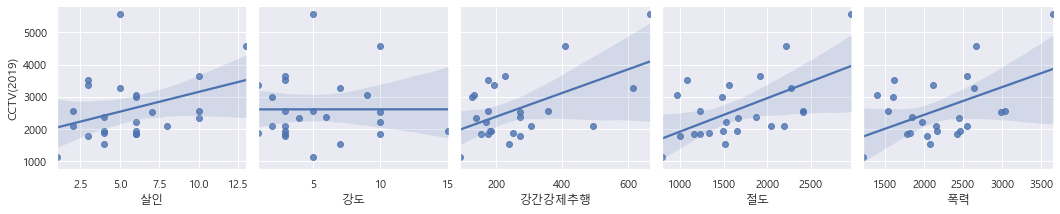

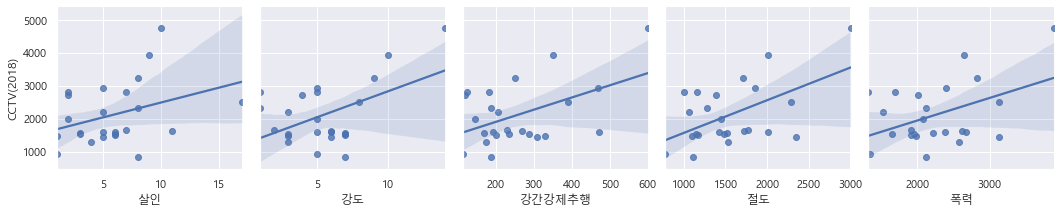

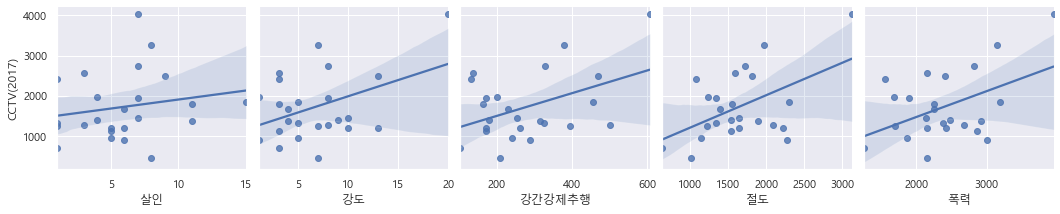

In [57]:
#CCTV 갯수와 5대범죄에 대한 상관 관계



sns.pairplot(crime_cctv_2019,y_vars=["CCTV(2019)"], x_vars=["살인", "강도", "강간강제추행", "절도", "폭력"], 
             size=3,kind="reg")

sns.pairplot(crime_cctv_2018, y_vars=["CCTV(2018)"], x_vars=["살인", "강도", "강간강제추행", "절도", "폭력"], 
             size=3, kind="reg")

sns.pairplot(crime_cctv_2017, y_vars=["CCTV(2017)"], x_vars=["살인", "강도", "강간강제추행", "절도", "폭력"], 
             size=3, kind="reg")



### 연도별 3개의 데이터를 평균으로 합쳐보기 

In [58]:
crime_cctv_2017.rename(columns = {'5대범죄' : '5대범죄 발생','CCTV(2017)':'CCTV'},inplace = True)
crime_cctv_2018.rename(columns = {'5대범죄' : '5대범죄 발생','CCTV(2018)':'CCTV'},inplace = True)
crime_cctv_2019.rename(columns = {'5대범죄' : '5대범죄 발생','CCTV(2019)':'CCTV'},inplace = True)

In [59]:
# 3년간 데이터 평균으로 합산 

crime_cctv_total =  ((crime_cctv_2017 + crime_cctv_2018 + crime_cctv_2019) / 3).round()

In [60]:
crime_cctv_total

,살인,강도,강간강제추행,절도,폭력,5대범죄 합계,CCTV
지역구,,,,,,,
종로구,6.0,7.0,242.0,1547.0,2062.0,3864.0,1495.0
용산구,2.0,4.0,310.0,1147.0,2132.0,3595.0,1520.0
성동구,3.0,6.0,130.0,1014.0,1426.0,2579.0,2760.0
광진구,6.0,7.0,254.0,1955.0,1969.0,4191.0,1751.0
동대문구,6.0,6.0,159.0,1508.0,2102.0,3782.0,2006.0
중랑구,6.0,3.0,161.0,1575.0,2630.0,4376.0,1596.0
성북구,6.0,4.0,177.0,1197.0,1734.0,3118.0,2754.0
강북구,7.0,6.0,191.0,1118.0,2234.0,3556.0,1038.0
도봉구,1.0,4.0,102.0,735.0,1277.0,2119.0,924.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


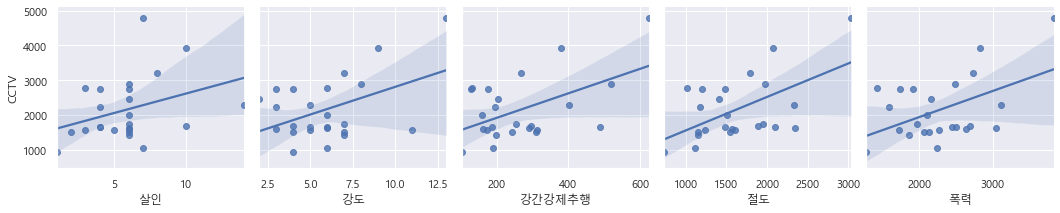

In [61]:
sns.pairplot(crime_cctv_total,y_vars=["CCTV"], x_vars=["살인", "강도", "강간강제추행", "절도", "폭력"], 
             size=3,kind="reg")

In [62]:
# 5대범죄 대비 cctv개수 
crime_cctv_total['CCTV개수/5대범죄 발생'] = (crime_cctv_total['CCTV']/crime_cctv_total['5대범죄 합계']*100).round(2)

In [63]:
crime_cctv_total.sort_values(by='CCTV개수/5대범죄 발생',ascending=False)

,살인,강도,강간강제추행,절도,폭력,5대범죄 합계,CCTV,CCTV개수/5대범죄 발생
지역구,,,,,,,,
성동구,3.0,6.0,130.0,1014.0,1426.0,2579.0,2760.0,107.02
성북구,6.0,4.0,177.0,1197.0,1734.0,3118.0,2754.0,88.33
양천구,4.0,3.0,128.0,1484.0,1918.0,3537.0,2758.0,77.98
서대문구,4.0,3.0,194.0,1173.0,1579.0,2953.0,2234.0,75.65
관악구,10.0,9.0,380.0,2071.0,2823.0,5293.0,3929.0,74.23
구로구,8.0,7.0,268.0,1786.0,2735.0,4804.0,3208.0,66.78
은평구,6.0,2.0,204.0,1410.0,2163.0,3784.0,2456.0,64.90
강남구,7.0,13.0,624.0,3035.0,3833.0,7512.0,4784.0,63.68
서초구,6.0,8.0,519.0,1978.0,2481.0,4992.0,2900.0,58.09


In [64]:
crime_cctv_total=crime_cctv_total.reset_index()

<Figure size 720x720 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

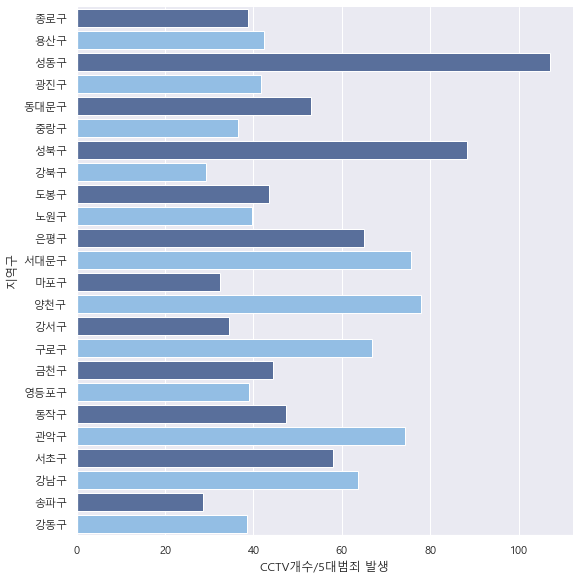

In [65]:
plt.figure(figsize = (10,10))
colors=['#4E6BA6','#85BFF2']
palette = sns.color_palette(colors)
sns.catplot(x='CCTV개수/5대범죄 발생', y='지역구', 
           kind='bar',size=8,data=crime_cctv_total,palette=palette,)

plt.savefig('../[0]data/cctv개수대비_5대범죄발생.png')
# colors=['#4E6BA6','#85BFF2','#D99A25','#F2BE5C','#F2F2F2']


In [66]:
crime_cctv_total.rename(columns = {'5대범죄 합계' : '5대범죄 발생'},inplace = True)

In [67]:
del crime_cctv_total["CCTV개수/5대범죄 발생"]

In [68]:
crime_cctv_total

,지역구,살인,강도,강간강제추행,절도,폭력,5대범죄 발생,CCTV
0,종로구,6.0,7.0,242.0,1547.0,2062.0,3864.0,1495.0
1,용산구,2.0,4.0,310.0,1147.0,2132.0,3595.0,1520.0
2,성동구,3.0,6.0,130.0,1014.0,1426.0,2579.0,2760.0
3,광진구,6.0,7.0,254.0,1955.0,1969.0,4191.0,1751.0
4,동대문구,6.0,6.0,159.0,1508.0,2102.0,3782.0,2006.0
5,중랑구,6.0,3.0,161.0,1575.0,2630.0,4376.0,1596.0
6,성북구,6.0,4.0,177.0,1197.0,1734.0,3118.0,2754.0
7,강북구,7.0,6.0,191.0,1118.0,2234.0,3556.0,1038.0
8,도봉구,1.0,4.0,102.0,735.0,1277.0,2119.0,924.0
9,노원구,4.0,6.0,186.0,1486.0,2441.0,4123.0,1640.0


In [69]:
crime_cctv_total=crime_cctv_total.sort_values(by='5대범죄 발생')

In [70]:
crime_cctv_total.to_csv('../[0]data/CCTV_5대범죄(시각화).csv')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, '<서울시 CCTV개수와 5대범죄발생건수>')

<AxesSubplot:xlabel='지역구', ylabel='5대범죄 발생'>

<AxesSubplot:label='9edfa23e-4372-4749-865f-a6bcc6e4961e', title={'center':'<서울시 CCTV개수와 5대범죄발생건수>'}, xlabel='지역구', ylabel='CCTV'>

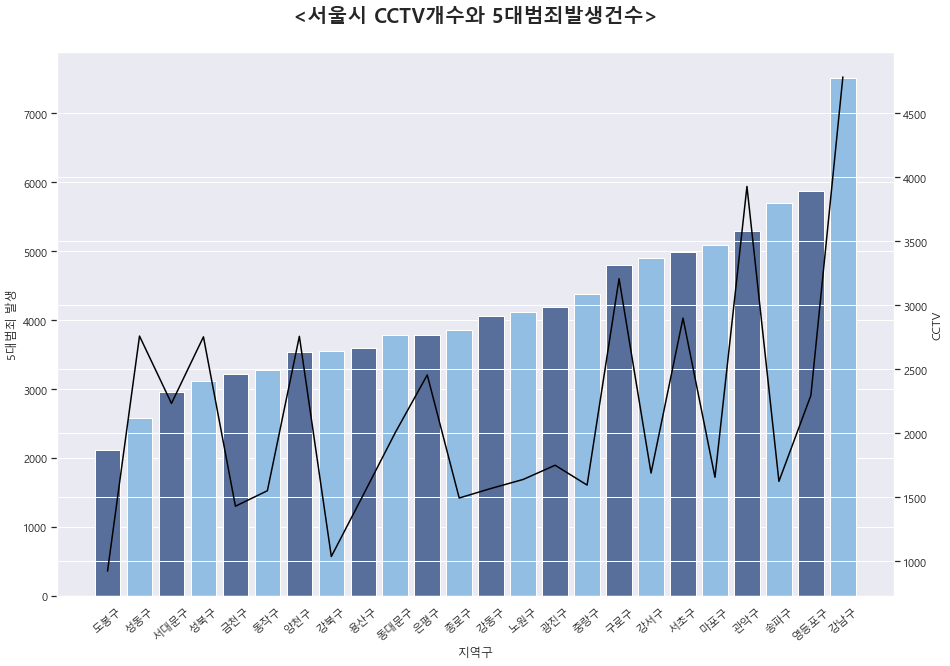

In [71]:
# plt.figure(figsize = (10,10))
fig,axe1 = plt.subplots()
plt.xticks(rotation =40 )
axe2 = axe1.twinx()
colors = ["#4E6BA6","#85BFF2"]

palette = sns.color_palette(colors)
plt.title('<서울시 CCTV개수와 5대범죄발생건수>',fontsize=20,pad=30,fontweight="bold")
sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font='Malgun Gothic',
        rc={"axes.unicode_minus":False},
        style='darkgrid')

sns.barplot(ax=axe1,x="지역구",y="5대범죄 발생",data=crime_cctv_total,palette =palette )
sns.lineplot(ax=axe2,x="지역구",y="CCTV",data=crime_cctv_total,color="black")
plt.savefig('../[0]data/서울시_CCTV개수와_5대범죄_발생건수_fin.png')